In [30]:
import requests
import pandas as pd
import numpy as np
import matplotlib 

url = 'https://fantasy.premierleague.com/api/bootstrap-static/'
r = requests.get(url)
json = r.json()
pd.options.display.max_columns = None
pd.options.mode.chained_assignment = None # default='warn'

elements_df = pd.DataFrame(json['elements'])
elements_types_df = pd.DataFrame(json['element_types'])
teams_df = pd.DataFrame(json['teams'])
#elements_df.columns

In [31]:
fplstats_df = elements_df[['first_name','second_name','now_cost','minutes','value_season','total_points','element_type', 'team']]

In [32]:
fplstats_df.loc[:,'position'] = fplstats_df.element_type.map(elements_types_df.set_index('id').singular_name)

In [33]:
fplstats_df.loc[:,'team'] = fplstats_df.team.map(teams_df.set_index('id').name)

In [34]:
fplstats_df['value'] = fplstats_df.value_season.astype(float)

In [35]:
fpl_stats = fplstats_df.drop('element_type', 1)
fpl_stats = fpl_stats.drop('value_season', 1)
#fpl_stats.head()

C:\Users\B0SS\AppData\Local\Temp/ipykernel_11572/2081268054.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  fpl_stats = fplstats_df.drop('element_type', 1)
C:\Users\B0SS\AppData\Local\Temp/ipykernel_11572/2081268054.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  fpl_stats = fpl_stats.drop('value_season', 1)


In [36]:
testdf = fpl_stats[fpl_stats.columns[[5,0,1,6,2,3,4,7]]]
testdf = testdf.rename({'team': 'Team', 'first_name': 'FirstName','second_name': 'SecondName', 'position': 'Position','now_cost': 'Cost', 'minutes': 'MinsPlayed','total_points': 'TotalPoints', 'value': 'Value'}, axis='columns')
#testdf.head(20)

In [37]:
fpl_stats = testdf
#fpl_stats.head(50)

In [38]:
fpl_stats = fpl_stats.loc[fpl_stats.Value > 0]

In [39]:
FWstats = fpl_stats.loc[fpl_stats.Position == 'Forward']
MFstats = fpl_stats.loc[fpl_stats.Position == 'Midfielder']
DFstats = fpl_stats.loc[fpl_stats.Position == 'Defender']
GKstats = fpl_stats.loc[fpl_stats.Position == 'Goalkeeper']

,Team,FirstName,SecondName,Position,Cost,MinsPlayed,TotalPoints,Value
389,Spurs,Harry,Kane,Forward,125,3083,242,19.4
228,Leeds,Patrick,Bamford,Forward,80,3052,194,24.2
202,Leicester,Jamie,Vardy,Forward,105,2838,187,17.8
41,Aston Villa,Ollie,Watkins,Forward,75,3328,168,22.4
189,Everton,Dominic,Calvert-Lewin,Forward,80,2871,165,20.6
249,Liverpool,Roberto,Firmino,Forward,90,2837,141,15.7
116,Burnley,Chris,Wood,Forward,70,2741,138,19.7
375,Southampton,Che,Adams,Forward,70,2662,137,19.6
320,Newcastle,Callum,Wilson,Forward,75,2081,134,17.9
3,Arsenal,Pierre-Emerick,Aubameyang,Forward,100,2330,131,13.1


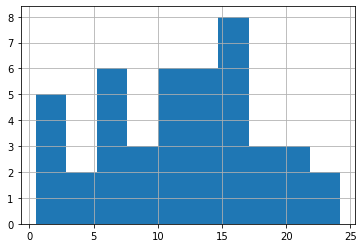

In [40]:
FWstats.Value.hist()
FWstats.sort_values('TotalPoints',ascending=False).head(10)


,Team,FirstName,SecondName,Position,Cost,MinsPlayed,TotalPoints,Value
299,Man Utd,Bruno Miguel,Borges Fernandes,Midfielder,120,3101,244,20.3
254,Liverpool,Mohamed,Salah,Midfielder,125,3077,231,18.5
391,Spurs,Heung-Min,Son,Midfielder,100,3119,228,22.8
251,Liverpool,Sadio,Mané,Midfielder,120,2808,176,14.7
303,Man Utd,Marcus,Rashford,Midfielder,95,2917,174,18.3
227,Leeds,Stuart,Dallas,Midfielder,55,3410,171,31.1
239,Leeds,Jack,Harrison,Midfielder,60,2846,160,26.7
272,Man City,Ilkay,Gündogan,Midfielder,75,2025,157,20.9
371,Southampton,James,Ward-Prowse,Midfielder,65,3420,156,24.0
277,Man City,Raheem,Sterling,Midfielder,110,2534,154,14.0


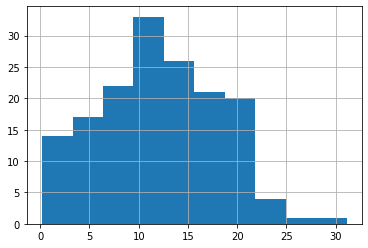

In [41]:
MFstats.Value.hist()
MFstats.sort_values('TotalPoints',ascending=False).head(10)

,Team,FirstName,SecondName,Position,Cost,MinsPlayed,TotalPoints,Value
255,Liverpool,Andrew,Robertson,Defender,70,3384,161,23.0
258,Liverpool,Trent,Alexander-Arnold,Defender,75,3029,160,21.3
451,West Ham,Aaron,Cresswell,Defender,55,3170,153,27.8
310,Man Utd,Aaron,Wan-Bissaka,Defender,55,3060,144,26.2
284,Man City,Rúben Santos,Gato Alves Dias,Defender,60,2843,142,23.7
144,Chelsea,Benjamin,Chilwell,Defender,60,2286,139,23.2
40,Aston Villa,Matt,Targett,Defender,50,3404,138,27.6
278,Man City,João Pedro Cavaco,Cancelo,Defender,60,2298,138,23.0
86,Brighton,Lewis,Dunk,Defender,50,2932,130,26.0
274,Man City,John,Stones,Defender,55,1933,128,23.3


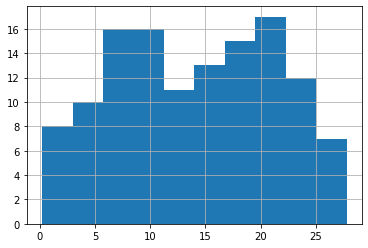

In [42]:
DFstats.Value.hist()
DFstats.sort_values('TotalPoints',ascending=False).head(10)

,Team,FirstName,SecondName,Position,Cost,MinsPlayed,TotalPoints,Value
32,Aston Villa,Emiliano,Martínez,Goalkeeper,55,3420,186,33.8
279,Man City,Ederson,Santana de Moraes,Goalkeeper,60,3240,160,26.7
238,Leeds,Illan,Meslier,Goalkeeper,50,3150,154,30.8
385,Spurs,Hugo,Lloris,Goalkeeper,55,3420,149,27.1
119,Burnley,Nick,Pope,Goalkeeper,55,2880,144,26.2
252,Liverpool,Alisson,Ramses Becker,Goalkeeper,60,2970,140,23.3
152,Chelsea,Edouard,Mendy,Goalkeeper,60,2745,140,23.3
448,West Ham,Lukasz,Fabianski,Goalkeeper,50,3150,133,26.6
468,Wolves,Rui Pedro,dos Santos Patrício,Goalkeeper,50,3330,132,26.4
0,Arsenal,Bernd,Leno,Goalkeeper,50,3131,131,26.2


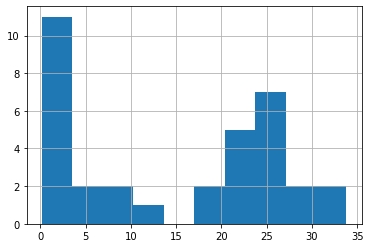

In [43]:
GKstats.Value.hist()
GKstats.sort_values('TotalPoints',ascending=False).head(10)

In [46]:
testppmp = fpl_stats
testppmp['PPMP'] = testppmp['TotalPoints'] / testppmp['MinsPlayed']
testppmp = testppmp.loc[testppmp.MinsPlayed > (testppmp['MinsPlayed'].mean())]
testppmp.sort_values('PPMP',ascending=False).head(20)

,Team,FirstName,SecondName,Position,Cost,MinsPlayed,TotalPoints,Value,PPMP
299,Man Utd,Bruno Miguel,Borges Fernandes,Midfielder,120,3101,244,20.3,0.078684
389,Spurs,Harry,Kane,Forward,125,3083,242,19.4,0.078495
272,Man City,Ilkay,Gündogan,Midfielder,75,2025,157,20.9,0.077531
254,Liverpool,Mohamed,Salah,Midfielder,125,3077,231,18.5,0.075073
276,Man City,Riyad,Mahrez,Midfielder,90,1945,145,16.1,0.074550
391,Spurs,Heung-Min,Son,Midfielder,100,3119,228,22.8,0.073100
273,Man City,Kevin,De Bruyne,Midfielder,120,1995,141,11.8,0.070677
5,Arsenal,Alexandre,Lacazette,Forward,85,1916,129,15.2,0.067328
274,Man City,John,Stones,Defender,55,1933,128,23.3,0.066218
202,Leicester,Jamie,Vardy,Forward,105,2838,187,17.8,0.065891
